Found 29324 files belonging to 3 classes.


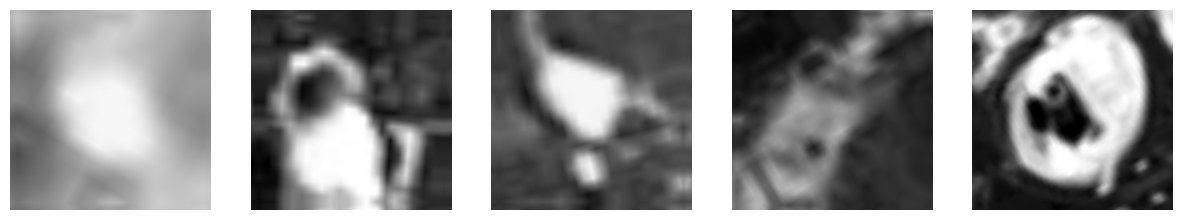

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/clasification-roi',
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
])

def display_augmented_images(dataset, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):

        image, label = next(iter(dataset))
        augmented_image = data_augmentation(image)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.axis('off')
    plt.show()

display_augmented_images(dataset)

In [ ]:
#Resizing operatron,rescaling,random crop

Found 29324 files belonging to 3 classes.


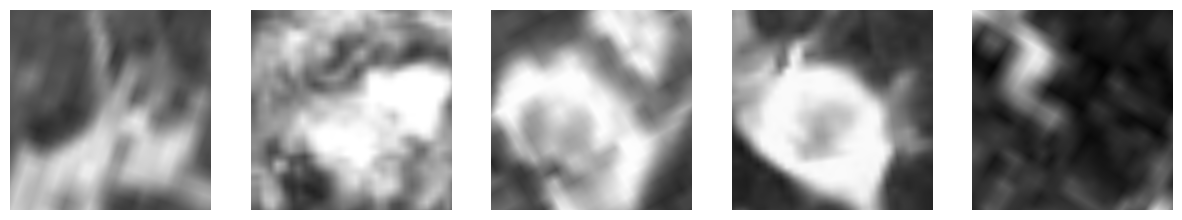

Total number of images in the dataset: 29324


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/clasification-roi',  # Use forward slashes or double backslashes
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

# Data augmentation with normalization and random cropping
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.RandomCrop(height=200, width=200),  # Crop to 200x200 pixels
    tf.keras.layers.Rescaling(1./255),  # Normalize the images to [0, 1]
])

# Function to display augmented images
def display_augmented_images(dataset, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        image, label = next(iter(dataset))
        augmented_image = data_augmentation(image)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(augmented_image[0].numpy())  # Display in the range [0, 1]
        plt.axis('off')
    plt.show()

# Function to count the total number of images in the dataset
def count_images(dataset):
    image_count = 0
    for batch in dataset:
        images, labels = batch
        image_count += images.shape[0]  # Add the number of images in the current batch
    return image_count

# Display augmented images
display_augmented_images(dataset)

# Count and print the total number of images
total_images = count_images(dataset)
print(f'Total number of images in the dataset: {total_images}')


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/clasification-roi',
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

# Data augmentation with normalization and random cropping
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.RandomCrop(height=200, width=200),  # Crop to 200x200 pixels
    tf.keras.layers.Rescaling(1./255),  # Normalize the images to [0, 1]
])

def display_augmented_images(dataset, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        image, label = next(iter(dataset))
        augmented_image = data_augmentation(image)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(augmented_image[0].numpy())  # Display in the range [0, 1]
        plt.axis('off')
    plt.show()

display_augmented_images(dataset)

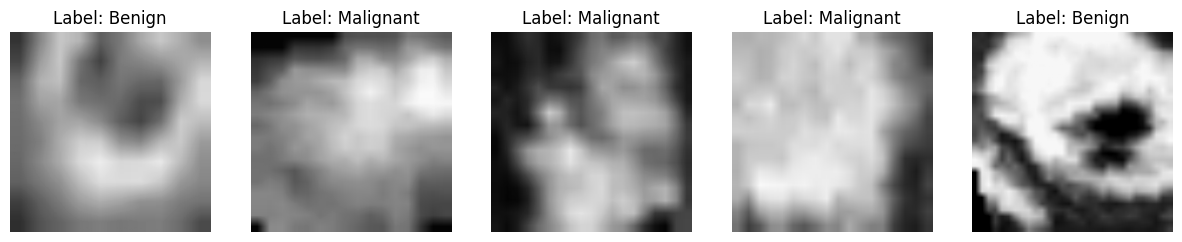

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image

# Define the image transformations for training (augmentation + normalization)
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),  # Rotation in degrees
    transforms.RandomResizedCrop((200, 200)),  # Random crop to 200x200
    transforms.ColorJitter(contrast=0.1, brightness=0.1, saturation=0.1),  # Random contrast, brightness, and saturation
    transforms.RandomGrayscale(p=0.1),  # Apply grayscale with a probability of 10%
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to range [-1, 1]
])

# Define transformations for test and validation (resize + normalization)
test_val_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 200x200
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to range [-1, 1]
])

# Load the datasets
train_dataset = ImageFolder('/content/drive/MyDrive/clasification-roi/train', transform=train_transform)
val_dataset = ImageFolder('/content/drive/MyDrive/clasification-roi/val', transform=test_val_transform)
test_dataset = ImageFolder('/content/drive/MyDrive/clasification-roi/test', transform=test_val_transform)

# Create DataLoaders to handle batches
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Function to display augmented images from the training set along with labels
def display_augmented_images(dataloader, num_images=5):
    class_names = dataloader.dataset.classes  # Get class names from the dataset
    plt.figure(figsize=(15, 5))
    data_iter = iter(dataloader)

    for i in range(num_images):
        images, labels = next(data_iter)
        image = images[0]  # Get the first image in the batch
        label = labels[0].item()  # Get the corresponding label

        image = image.permute(1, 2, 0)  # Rearrange dimensions to [height, width, channels]
        image = image * 0.5 + 0.5  # Reverse normalization to [0, 1] range

        plt.subplot(1, num_images, i + 1)
        plt.imshow(image.numpy())
        plt.title(f'Label: {class_names[label]}')  # Display the label as the title
        plt.axis('off')
    plt.show()

# Function to count the total number of images in a dataset
def count_images(dataloader):
    image_count = 0
    for images, labels in dataloader:
        image_count += images.size(0)  # Add the number of images in the current batch
    return image_count

# Display augmented images from the training set along with labels
display_augmented_images(train_loader)

# Count and print the total number of images in train, val, and test datasets
train_images = count_images(train_loader)
val_images = count_images(val_loader)
test_images = count_images(test_loader)

print(f'Total number of images in the training dataset: {train_images}')
print(f'Total number of images in the validation dataset: {val_images}')
print(f'Total number of images in the test dataset: {test_images}')


Different Augmentations for Class: Benign


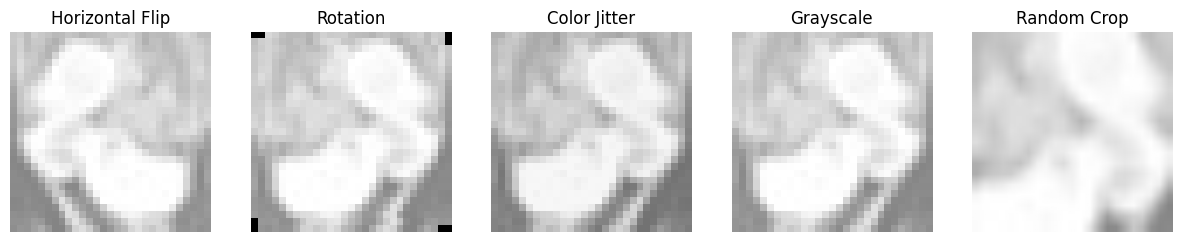

Different Augmentations for Class: Malignant


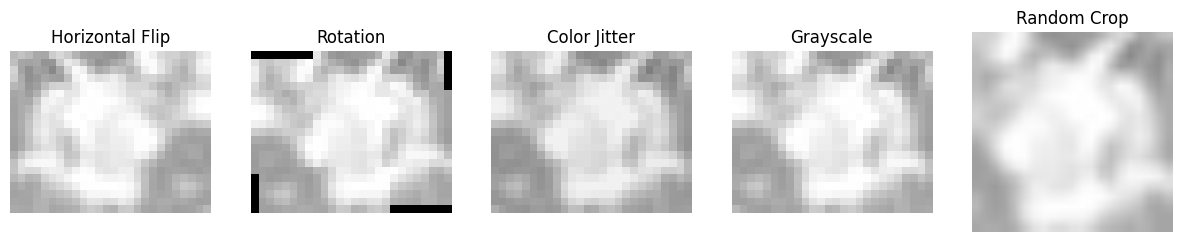

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image

# Define the image transformations for individual augmentations
augmentation_transforms = {
    'Horizontal Flip': transforms.RandomHorizontalFlip(p=1),
    'Rotation': transforms.RandomRotation(20),
    'Color Jitter': transforms.ColorJitter(contrast=0.5, brightness=0.5, saturation=0.5),
    'Grayscale': transforms.RandomGrayscale(p=1),
    'Random Crop': transforms.RandomResizedCrop((200, 200))
}

# Basic normalization to apply after augmentation
post_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to range [-1, 1]
])

# Load the dataset (use a small subset for simplicity)
train_dataset = ImageFolder('/content/drive/MyDrive/clasification-roi/train', transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

# Function to display different augmentations for a specific class (benign or malignant)
def display_augmentations_for_class(class_label, dataloader, num_images=5):
    plt.figure(figsize=(15, 5))

    # Get images from the specified class
    data_iter = iter(dataloader)
    images_shown = 0

    for images, labels in data_iter:
        if labels[0].item() == class_label:
            image = images[0]  # Get the first image
            image_pil = transforms.ToPILImage()(image * 0.5 + 0.5)  # Reverse normalization for display

            # Apply each augmentation and display
            for i, (aug_name, aug_transform) in enumerate(augmentation_transforms.items()):
                augmented_image = aug_transform(image_pil)
                augmented_image = post_transform(augmented_image)

                augmented_image = augmented_image.permute(1, 2, 0)  # Convert from [C, H, W] to [H, W, C]
                augmented_image = augmented_image * 0.5 + 0.5  # Denormalize

                plt.subplot(1, len(augmentation_transforms), i + 1)
                plt.imshow(augmented_image.numpy())
                plt.title(aug_name)
                plt.axis('off')

            images_shown += 1
            if images_shown >= num_images:
                break
    plt.show()

# Display augmentations for class 0 (Benign) and class 1 (Malignant)
print("Different Augmentations for Class: Benign")
display_augmentations_for_class(class_label=0, dataloader=train_loader)

print("Different Augmentations for Class: Malignant")
display_augmentations_for_class(class_label=1, dataloader=train_loader)


Train Set: Benign = 5559, Malignant = 14905
Test Set: Benign = 1938, Malignant = 4923
Validation Set: Benign = 418, Malignant = 1581


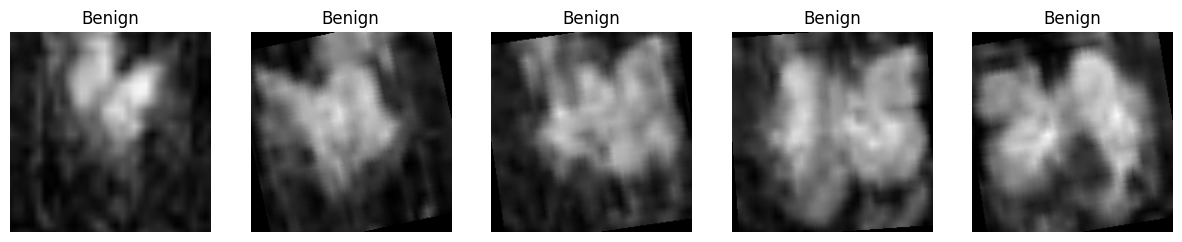

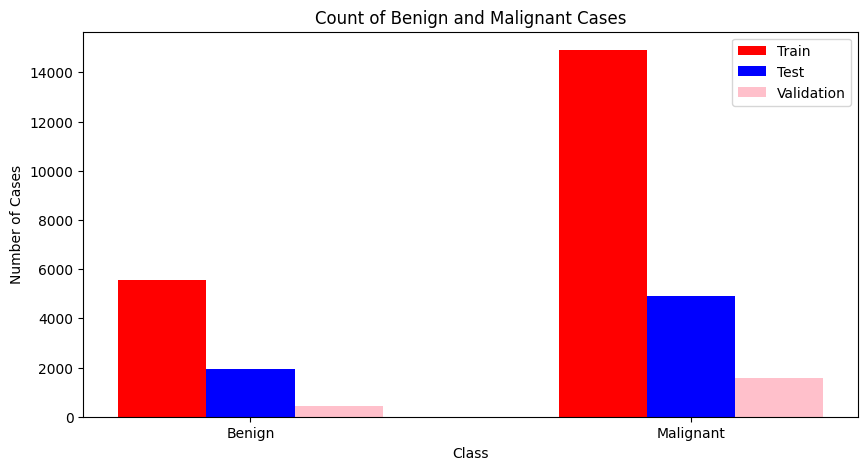

In [ ]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the dataset path
data_directory = '/content/drive/MyDrive/clasification-roi'  # Updated to your dataset path

# Define transformations for training dataset
train_data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomCrop(210),  # Randomly crop images to 210x210
    transforms.RandomHorizontalFlip(),  # Horizontal flipping
    transforms.RandomRotation(15),  # Random rotation
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])

# Define transformations for validation and test datasets
test_data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(15),  # Random rotation
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])

valid_data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(15),  # Random rotation
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])

# Load datasets
train_data = datasets.ImageFolder(root=os.path.join(data_directory, 'train'), transform=train_data_transform)
test_data = datasets.ImageFolder(root=os.path.join(data_directory, 'test'), transform=test_data_transform)
valid_data = datasets.ImageFolder(root=os.path.join(data_directory, 'val'), transform=valid_data_transform)  # Assuming you have a 'val' folder

# Create data loaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
valid_loader = DataLoader(valid_data, batch_size=32, shuffle=False)

# Count classes in datasets
benign_count_train = train_data.targets.count(0)
malignant_count_train = train_data.targets.count(1)
print(f'Train Set: Benign = {benign_count_train}, Malignant = {malignant_count_train}')

benign_count_test = test_data.targets.count(0)
malignant_count_test = test_data.targets.count(1)
print(f'Test Set: Benign = {benign_count_test}, Malignant = {malignant_count_test}')

benign_count_valid = valid_data.targets.count(0)
malignant_count_valid = valid_data.targets.count(1)
print(f'Validation Set: Benign = {benign_count_valid}, Malignant = {malignant_count_valid}')

# Function to unnormalize images for display
def unnormalize_image(img, mean, std):
    img = img.clone()  # Clone to avoid modifying the original tensor
    for t, m, s in zip(img, mean, std):
        t.mul_(s).add_(m)  # Unnormalize each channel
    return img

# Function to display sample images
def show_sample_images(data, num_images=5):
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        img, lbl = data[i]
        img = unnormalize_image(img, mean, std)  # Unnormalize
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img.permute(1, 2, 0).numpy())
        plt.title(data.classes[lbl])
        plt.axis('off')
    plt.show()

# Display sample images from training set
show_sample_images(train_data)

# Plotting the class counts for each dataset with custom colors
class_labels = ['Benign', 'Malignant']
train_class_counts = [benign_count_train, malignant_count_train]
test_class_counts = [benign_count_test, malignant_count_test]
valid_class_counts = [benign_count_valid, malignant_count_valid]

x_pos = range(len(class_labels))
bar_width = 0.2

plt.figure(figsize=(10, 5))

# Custom colors for bars
train_color = 'red'
test_color = 'blue'
valid_color = 'pink'

# Plot each dataset with a unique color
plt.bar(x_pos, train_class_counts, width=bar_width, color=train_color, label='Train', align='center')
plt.bar([p + bar_width for p in x_pos], test_class_counts, width=bar_width, color=test_color, label='Test', align='center')
plt.bar([p + 2 * bar_width for p in x_pos], valid_class_counts, width=bar_width, color=valid_color, label='Validation', align='center')

plt.xlabel('Class')
plt.ylabel('Number of Cases')
plt.title('Count of Benign and Malignant Cases')
plt.xticks([p + bar_width for p in x_pos], class_labels)
plt.legend()

# Display the graph
plt.show()